# Preprocessing

In [51]:
import numpy as np
import pandas as pd
import os
file_path = os.path.abspath('')
print(file_path)
DATA_FOLDER_PATH = os.path.join(file_path, 'data')
PROCESSED_DATA_FOLDER_PATH = os.path.join(file_path, 'processed_data')
if not os.path.exists(PROCESSED_DATA_FOLDER_PATH):
    os.mkdir(PROCESSED_DATA_FOLDER_PATH)

seed = 15071

c:\Users\tinus\OneDrive\Dokumenter\01 MIT H23\15.071 The Analytics Edge\The-Analyst-Edge-Project


In [52]:
df = pd.read_csv(os.path.join(DATA_FOLDER_PATH, 'dataset.csv'))
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [53]:
df['Application order'].unique()

array([5, 1, 2, 4, 3, 6, 9, 0], dtype=int64)

## Transfer to correct data type

In [54]:
categorical_values = [
    "Marital status",
    "Application mode",
    "Course",
    "Daytime/evening attendance",
    "Previous qualification",
    "Nacionality",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Displaced",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "International",
    "Target"
]
float_values = [
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]
int_values = list(df.columns.drop(categorical_values).drop(float_values))
print(int_values)


['Application order', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)']


In [55]:
print(len(df.columns) == len(categorical_values) + len(float_values) + len(int_values))

True


In [56]:
# Convert columns in categorical_values to 'category' dtype
for col in categorical_values:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Convert columns in float_values to 'float' dtype
for col in float_values:
    if col in df.columns:
        df[col] = df[col].astype(float)

# Convert columns in int_values to 'int' dtype
for col in int_values:
    if col in df.columns:
        df[col] = df[col].astype(int)


In [57]:
# Filter out rows where 'Target' is 'Enrolled'
df_filtered = df[df['Target'].isin(['Dropout', 'Graduate'])]

df_filtered['Target'] = df_filtered['Target'].cat.remove_unused_categories()
df = df_filtered
print(df['Target'].unique())
print(len(df))

['Dropout', 'Graduate']
Categories (2, object): ['Dropout', 'Graduate']
3630


C:\Users\tinus\AppData\Local\Temp\ipykernel_4384\1398834565.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Target'] = df_filtered['Target'].cat.remove_unused_categories()


## Make train and test sets for consistency with correct dayatypes

In [58]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (70% train, 30% test)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Create the folder if it doesn't exist
os.makedirs(PROCESSED_DATA_FOLDER_PATH, exist_ok=True)

# File paths for the CSV files
train_file_path = os.path.join(PROCESSED_DATA_FOLDER_PATH, 'train.csv')
test_file_path = os.path.join(PROCESSED_DATA_FOLDER_PATH, 'test.csv')

# Save the DataFrames as CSV files
train_df.to_csv(train_file_path, index=False)
test_df.to_csv(test_file_path, index=False)


## Here, I wanna try to really understand what the deal is with Curricular units 1st sem (grade) and Curricular units 2nd sem (grade) 

In [59]:
curricular_vars_1st_sem = [
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)"
]
df_cur = df[curricular_vars_1st_sem]

In [60]:
for column in df_cur.columns:
    print(f"Frequency of values in column '{column}':")
    print(df[column].value_counts())
    print("\n")

Frequency of values in column 'Curricular units 1st sem (credited)':
0     3150
2       71
1       67
3       57
6       43
4       43
5       31
7       31
8       27
9       24
11      16
10      14
14      14
13      12
12      11
15       5
18       4
17       3
16       3
19       2
20       2
Name: Curricular units 1st sem (credited), dtype: int64


Frequency of values in column 'Curricular units 1st sem (enrolled)':
6     1594
5      749
7      546
8      264
0      152
12      54
10      43
11      37
9       31
15      24
14      22
4       21
18      19
13      16
17      13
16      12
3        9
2        7
21       6
1        6
19       2
23       2
26       1
Name: Curricular units 1st sem (enrolled), dtype: int64


Frequency of values in column 'Curricular units 1st sem (evaluations)':
8     674
7     621
6     530
0     321
9     296
10    235
5     193
11    162
12    160
13    104
14     77
15     49
16     37
17     29
18     22
19     18
4      18
21     15
22     10


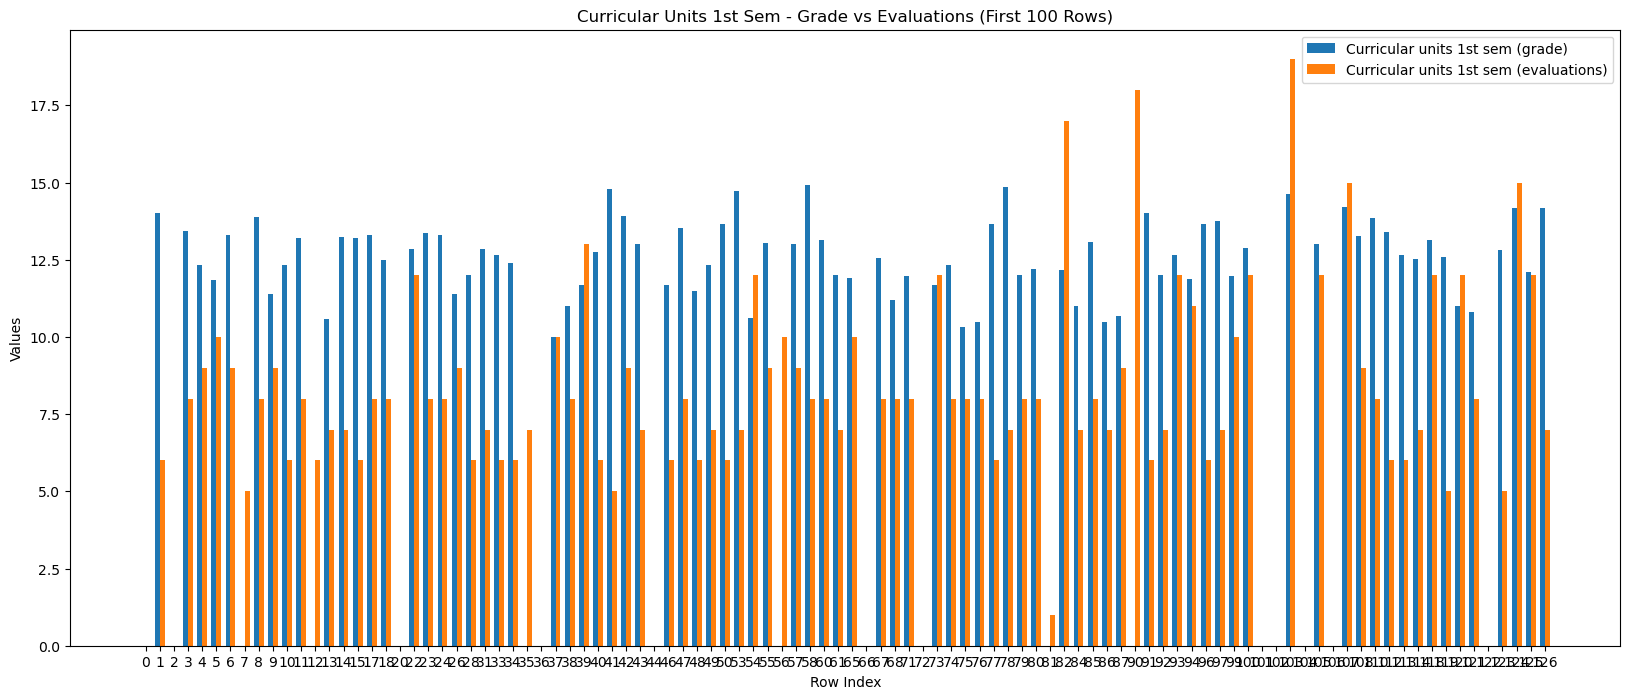

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_cur is your DataFrame and it contains the specified columns
# Selecting the first 100 rows for the plot
df_subset = df_cur.head(100)

# Setting the positions for the bars
bar_width = 0.35
index = np.arange(len(df_subset))

# Plotting
plt.figure(figsize=(20, 8))
plt.bar(index, df_subset['Curricular units 1st sem (grade)'], bar_width, label='Curricular units 1st sem (grade)')
plt.bar(index + bar_width, df_subset['Curricular units 1st sem (evaluations)'], bar_width, label='Curricular units 1st sem (evaluations)')

plt.xlabel('Row Index')
plt.ylabel('Values')
plt.title('Curricular Units 1st Sem - Grade vs Evaluations (First 100 Rows)')
plt.xticks(index + bar_width / 2, df_subset.index)
plt.legend()
plt.show()


## Create different datasets for different usecases

### A: With tuition fees up to date

In [62]:
## Case 1) With all the columns
df_all = df.copy()
## Case 2a) Without 2nd sem results columns
df_during_2nd_sem = df_all.drop(columns=['Curricular units 2nd sem (credited)',
                              'Curricular units 2nd sem (evaluations)',
                              'Curricular units 2nd sem (approved)',
                              'Curricular units 2nd sem (grade)',
                              'Curricular units 2nd sem (without evaluations)'])
## Case 2b) Without 2nd semester columns altogether
df_before_2nd_sem = df_during_2nd_sem.drop(columns=['Curricular units 2nd sem (enrolled)'])
## Case 3a) Without 1st semester results columns
df__during_1st_sem = df_before_2nd_sem.drop(columns=['Curricular units 1st sem (credited)',
                              'Curricular units 1st sem (evaluations)',
                              'Curricular units 1st sem (approved)',
                              'Curricular units 1st sem (grade)',
                              'Curricular units 1st sem (without evaluations)'])
## Case 3a) Without 1st semester columns
df_before_1st_sem = df__during_1st_sem.drop(columns=['Curricular units 1st sem (enrolled)'])



In [63]:
### B: Without Tuition column
# Case 1: With all columns except "Tuition fees up to date"
df_all_no_tuition = df.drop(columns=['Tuition fees up to date'])

# Case 2a: Without 2nd sem results columns and "Tuition fees up to date"
df_during_2nd_sem_no_tuition = df_all_no_tuition.drop(columns=[
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)'
])

# Case 2b: Without 2nd semester columns altogether and "Tuition fees up to date"
df_before_2nd_sem_no_tuition = df_during_2nd_sem_no_tuition.drop(columns=['Curricular units 2nd sem (enrolled)'])

# Case 3a: Without 1st semester results columns and "Tuition fees up to date"
df_during_1st_sem_no_tuition = df_before_2nd_sem_no_tuition.drop(columns=[
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)'
])

# Case 3b: Without 1st semester columns and "Tuition fees up to date"
df_before_1st_sem_no_tuition = df_during_1st_sem_no_tuition.drop(columns=['Curricular units 1st sem (enrolled)'])



## WITH THE BACKLOG VARIABLE

In [64]:
# # Case C: With backlog variable
# df['backlog_1st_semester'] = (df['Curricular units 1st sem (credited)'] < df['Curricular units 1st sem (enrolled)']).astype(int)
# df['backlog_2nd_semester'] = (df['Curricular units 2nd sem (credited)'] < df['Curricular units 2nd sem (enrolled)']).astype(int)

# ## Case 1) With all the columns
# df_all = df.copy()
# ## Case 2a) Without 2nd sem results columns
# df_during_2nd_sem = df_all.drop(columns=['Curricular units 2nd sem (credited)',
#                               'Curricular units 2nd sem (evaluations)',
#                               'Curricular units 2nd sem (approved)',
#                               'Curricular units 2nd sem (grade)',
#                               'Curricular units 2nd sem (without evaluations)',
#                               'backlog_2nd_semester'])
# ## Case 2b) Without 2nd semester columns altogether
# df_before_2nd_sem = df_during_2nd_sem.drop(columns=['Curricular units 2nd sem (enrolled)'])
# ## Case 3a) Without 1st semester results columns
# df__during_1st_sem = df_before_2nd_sem.drop(columns=['Curricular units 1st sem (credited)',
#                               'Curricular units 1st sem (evaluations)',
#                               'Curricular units 1st sem (approved)',
#                               'Curricular units 1st sem (grade)',
#                               'Curricular units 1st sem (without evaluations)',
#                               'backlog_1st_semester'])
# ## Case 3a) Without 1st semester columns
# df_before_1st_sem = df__during_1st_sem.drop(columns=['Curricular units 1st sem (enrolled)'])

In [65]:
# # Case D: with backlog variable and without tuiotion.
# df_all_no_tuition = df.drop(columns=['Tuition fees up to date'])

# # Case 2a: Without 2nd sem results columns and "Tuition fees up to date"
# df_during_2nd_sem_no_tuition = df_all_no_tuition.drop(columns=[
#     'Curricular units 2nd sem (credited)',
#     'Curricular units 2nd sem (evaluations)',
#     'Curricular units 2nd sem (approved)',
#     'Curricular units 2nd sem (grade)',
#     'Curricular units 2nd sem (without evaluations)',
#     'backlog_2nd_semester'
# ])

# # Case 2b: Without 2nd semester columns altogether and "Tuition fees up to date"
# df_before_2nd_sem_no_tuition = df_during_2nd_sem_no_tuition.drop(columns=['Curricular units 2nd sem (enrolled)'])

# # Case 3a: Without 1st semester results columns and "Tuition fees up to date"
# df_during_1st_sem_no_tuition = df_before_2nd_sem_no_tuition.drop(columns=[
#     'Curricular units 1st sem (credited)',
#     'Curricular units 1st sem (evaluations)',
#     'Curricular units 1st sem (approved)',
#     'Curricular units 1st sem (grade)',
#     'Curricular units 1st sem (without evaluations)',
#     'backlog_1st_semester'
# ])

# # Case 3b: Without 1st semester columns and "Tuition fees up to date"
# df_before_1st_sem_no_tuition = df_during_1st_sem_no_tuition.drop(columns=['Curricular units 1st sem (enrolled)'])

In [66]:
datasets = {"All variables": df_all,
            "Before 2nd sem": df_before_2nd_sem,
            "Before 1st sem": df_before_1st_sem,
            "During 2nd sem": df_during_2nd_sem,
            "During 1st sem": df__during_1st_sem,
            "All variables without tuition with": df_all_no_tuition,
            "Before 2nd sem without tuition": df_before_2nd_sem_no_tuition,
            "Before 1st sem without tuition": df_before_1st_sem_no_tuition,
            "During 2nd sem without tuition": df_during_2nd_sem_no_tuition,
            "During 1st sem without tuition": df_during_1st_sem_no_tuition
            }


# Running the models

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import time
from sklearn.metrics import confusion_matrix

use_cv = True

# Define your models
models = {
    'Logistic Regression': LogisticRegression(max_iter = 1000),
    # 'Lasso': LogisticRegression(penalty='l1', solver='saga'),
    # 'Support Vector Classifier': SVC(),
    # 'CART': DecisionTreeClassifier(),
    # 'Random Forest': RandomForestClassifier(),
    'LightGBM': LGBMClassifier(),
    # 'XGBoost': XGBClassifier(enable_categorical=True),
    # 'Neural Network': (define your neural network model)
}

def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()  # Start time for training

    model.fit(X_train, y_train)  # Training the model

    end_time = time.time()  # End time after training
    training_time = end_time - start_time  # Calculate training time

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Compute confusion matrix for test data
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

    # Calculate metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test, average='weighted'),
        'Recall': recall_score(y_test, y_pred_test, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred_test, average='weighted'),
        'True Positives': tp,
        'True Negatives': tn,
        'False Positives': fp,
        'False Negatives': fn,
        'Training Time (seconds)': training_time
    }
    return metrics


if not use_cv:
    # Iterate over datasets and models
    results = {}
    for dataset_name, df in datasets.items():
        print(f"\nTraining on dataset: {dataset_name}")
        # Preprocess the data
        X = df.drop(columns=['Target'])
        y = df['Target']
        le = LabelEncoder()
        y_encoded = le.fit_transform(y)

        # Split the dataset
        X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

        # Evaluate each model
        results[dataset_name] = {}
        for model_name, model in models.items():
            print(f"Training model: {model_name}")
            metrics = train_evaluate_model(model, X_train, y_train, X_test, y_test)
            results[dataset_name][model_name] = metrics

    # results now contains the evaluation metrics for each model on each dataset


In [68]:
from sklearn.metrics import make_scorer
def true_positive(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp

def true_negative(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn

def false_positive(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp

def false_negative(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fn

tp_scorer = make_scorer(true_positive)
tn_scorer = make_scorer(true_negative)
fp_scorer = make_scorer(false_positive)
fn_scorer = make_scorer(false_negative)


In [78]:
trained_models = {}
if use_cv:
    from sklearn.model_selection import cross_validate

    scoring_metrics = {
        'accuracy': 'accuracy', 
        'precision_weighted': 'precision_weighted', 
        'recall_weighted': 'recall_weighted', 
        'f1_weighted': 'f1_weighted',
        'tp': make_scorer(true_positive),
        'tn': make_scorer(true_negative),
        'fp': make_scorer(false_positive),
        'fn': make_scorer(false_negative)
    }

    # Function to perform cross-validation and evaluate a model
    def evaluate_model_with_cv(model, X, y):
        cv_results = cross_validate(model, X, y, cv=10, scoring=scoring_metrics, return_estimator=True)
        
        # Calculate mean of scores for each metric
        metrics_summary = {metric: cv_results[f'test_{metric}'].mean() for metric in scoring_metrics}
        return metrics_summary, cv_results['estimator']

    # Iterate over datasets and models
    results = {}
    for dataset_name, df in datasets.items():
        print(f"\nEvaluating on dataset: {dataset_name}")

        # Preprocess the data
        X = df.drop(columns=['Target'])
        y = df['Target']
        # ... (additional preprocessing if needed)
        le = LabelEncoder()
        y_encoded = le.fit_transform(y)

        # Evaluate each model using cross-validation
        results[dataset_name] = {}
        trained_models[dataset_name] = {}
        for model_name, model in models.items():
            print(f"Evaluating model: {model_name}")
            cv_metrics, estimators = evaluate_model_with_cv(model, X, y_encoded)
            trained_models[dataset_name][model_name] = estimators

            results[dataset_name][model_name] = cv_metrics

    # results now contains the cross-validation metrics for each model on each dataset



Evaluating on dataset: All variables
Evaluating model: Logistic Regression
Evaluating model: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1989, number of negative: 1278
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 3267, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.608815 -> initscore=0.442336
[LightGBM] [Info] Start training from score 0.442336
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1988, number of negative: 1279
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] 

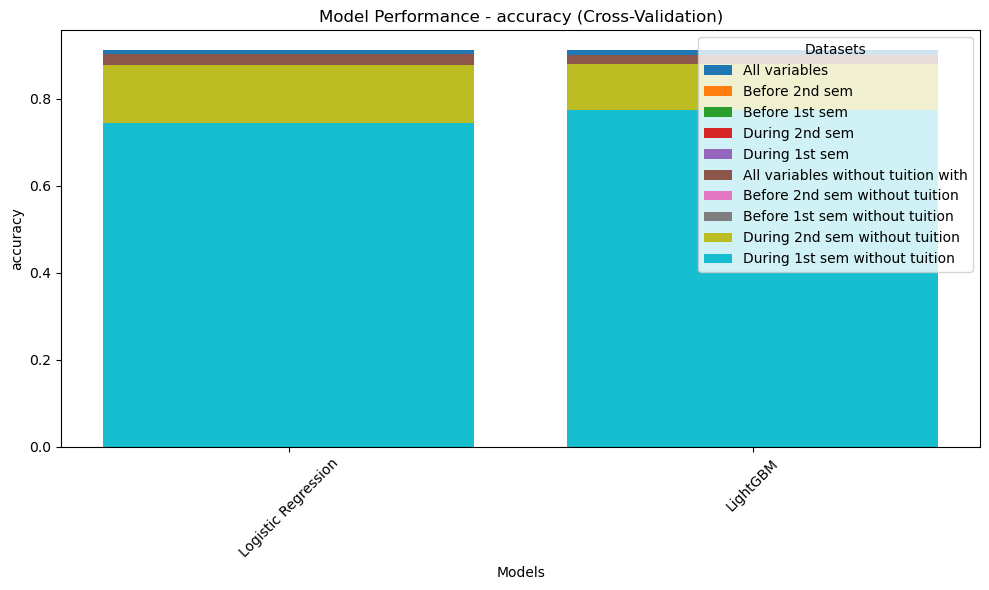

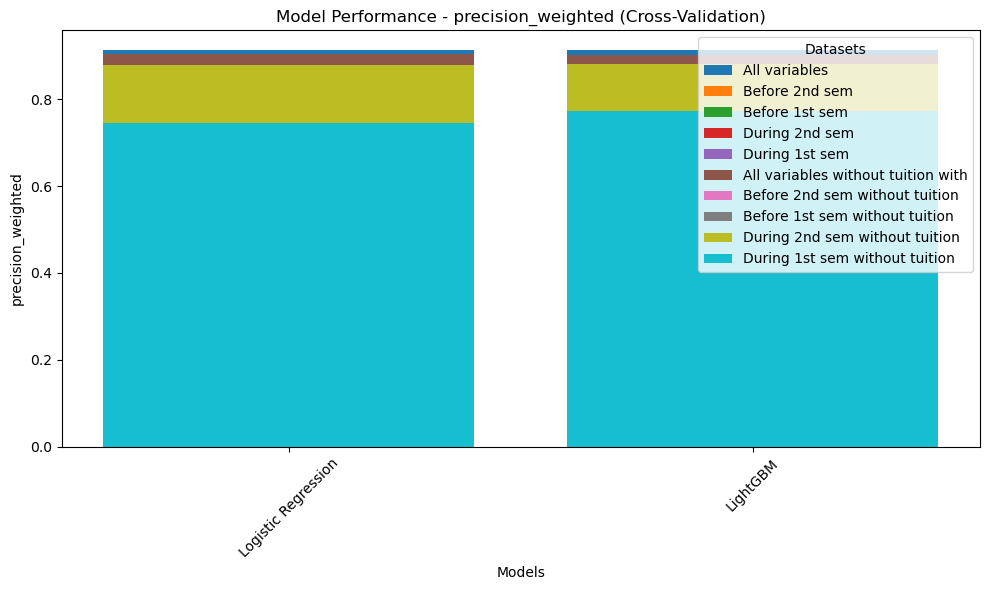

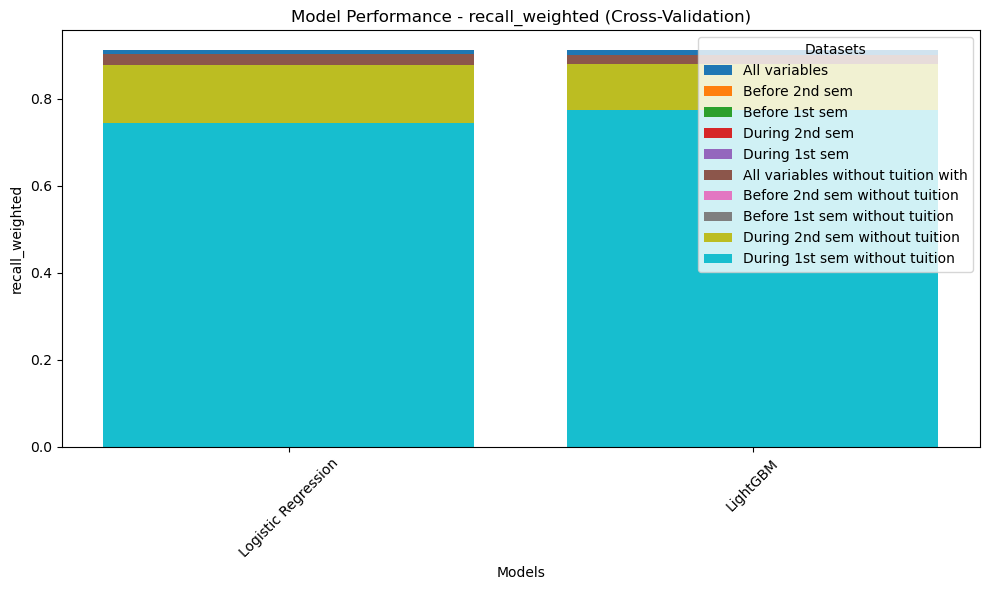

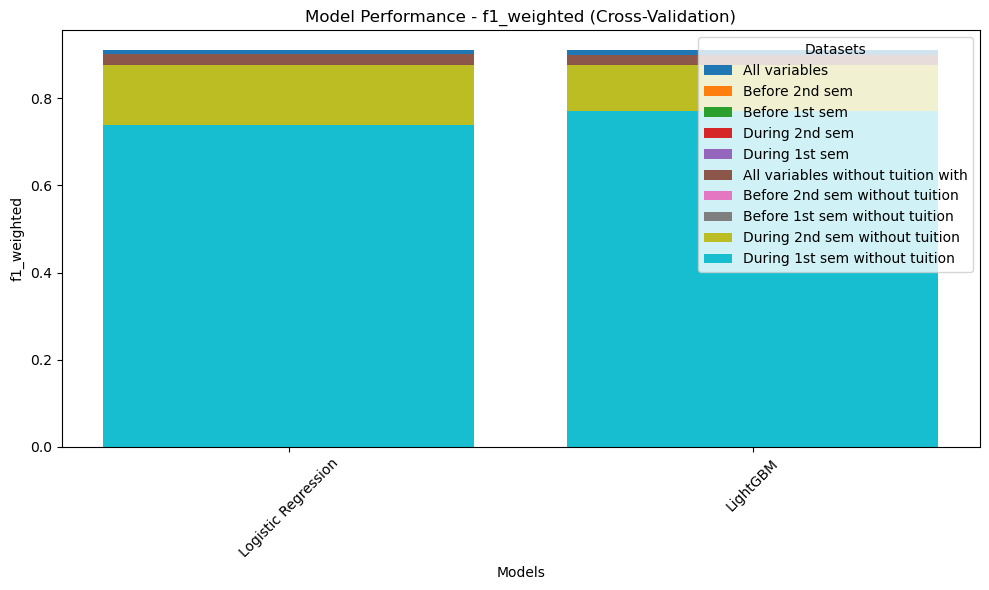

In [79]:
# Assuming 'results' is your dictionary containing performance metrics
metrics = ['Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time (seconds)']
if use_cv:
    metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    for dataset_name in results.keys():
        model_names = list(results[dataset_name].keys())
        values = [results[dataset_name][model][metric] for model in model_names]

        # Create a bar plot for each dataset
        plt.bar(model_names, values, label=dataset_name)
    
    plt.xlabel('Models')
    plt.ylabel(metric)
    title = f'Model Performance - {metric}'
    if use_cv:
        title += ' (Cross-Validation)'
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend(title='Datasets')
    plt.tight_layout()
    savepath = os.path.join('figures', title + '.png')
    plt.savefig(savepath)
    plt.show()



In [80]:
import pandas as pd

# Assuming 'results' is your dictionary containing performance metrics
# Transforming results into a format suitable for a DataFrame
data_for_df = []
for dataset_name, model_results in results.items():
    for model_name, metrics in model_results.items():
        data_for_df.append({
            'Dataset': dataset_name,
            'Model': model_name,
            **metrics  # This unpacks the metrics dictionary into the row
        })

# Creating a DataFrame
performance_df = pd.DataFrame(data_for_df)

# Printing the DataFrame
print(performance_df)

# Saving to CSV
csv_file_path = 'model_performance.xlsx'
if use_cv:
    csv_file_path = csv_file_path.replace('.xlsx', '_cv.xlsx')
performance_df.to_excel(os.path.join('results',csv_file_path), index=False)


                               Dataset                Model  accuracy  \
0                        All variables  Logistic Regression  0.911570   
1                        All variables             LightGBM  0.911019   
2                       Before 2nd sem  Logistic Regression  0.888154   
3                       Before 2nd sem             LightGBM  0.889532   
4                       Before 1st sem  Logistic Regression  0.754821   
5                       Before 1st sem             LightGBM  0.787052   
6                       During 2nd sem  Logistic Regression  0.890083   
7                       During 2nd sem             LightGBM  0.888154   
8                       During 1st sem  Logistic Regression  0.769146   
9                       During 1st sem             LightGBM  0.796970   
10  All variables without tuition with  Logistic Regression  0.903306   
11  All variables without tuition with             LightGBM  0.900551   
12      Before 2nd sem without tuition  Logistic Re

In [81]:
import os

# Assuming 'performance_df' is your DataFrame containing all the performance metrics
# Ensure the results directory exists
os.makedirs('results', exist_ok=True)

# Iterate over each unique dataset
for dataset_name in performance_df['Dataset'].unique():
    # Filter the DataFrame for the current dataset
    dataset_df = performance_df[performance_df['Dataset'] == dataset_name]

    # Drop the 'Dataset' column
    dataset_df = dataset_df.drop(columns=['Dataset'])

    # Print the subset DataFrame
    print(f"Results for dataset: {dataset_name}")
    print(dataset_df)

    # Saving to Excel
    excel_file_path = f'results/{dataset_name}_2.xlsx'
    if use_cv:
        excel_file_path = excel_file_path.replace('_2.xlsx', '_cv_2.xlsx')
    dataset_df.to_excel(excel_file_path, index=False)


Results for dataset: All variables
                 Model  accuracy  precision_weighted  recall_weighted  \
0  Logistic Regression  0.911570            0.912822         0.911570   
1             LightGBM  0.911019            0.912152         0.911019   

   f1_weighted     tp     tn    fp   fn  
0     0.910628  211.7  119.2  22.9  9.2  
1     0.910110  211.2  119.5  22.6  9.7  
Results for dataset: Before 2nd sem
                 Model  accuracy  precision_weighted  recall_weighted  \
2  Logistic Regression  0.888154            0.889494         0.888154   
3             LightGBM  0.889532            0.890658         0.889532   

   f1_weighted     tp     tn    fp    fn  
2     0.886738  208.3  114.1  28.0  12.6  
3     0.888348  207.9  115.0  27.1  13.0  
Results for dataset: Before 1st sem
                 Model  accuracy  precision_weighted  recall_weighted  \
4  Logistic Regression  0.754821            0.759689         0.754821   
5             LightGBM  0.787052            0.786289

Results for dataset: All variables without tuition with
                  Model  accuracy  precision_weighted  recall_weighted  \
10  Logistic Regression  0.903306            0.904486         0.903306   
11             LightGBM  0.900551            0.901507         0.900551   

    f1_weighted     tp     tn    fp    fn  
10      0.90225  210.2  117.7  24.4  10.7  
11      0.89959  209.1  117.8  24.3  11.8  
Results for dataset: Before 2nd sem without tuition
                  Model  accuracy  precision_weighted  recall_weighted  \
12  Logistic Regression  0.876033            0.876650         0.876033   
13             LightGBM  0.875482            0.876326         0.875482   

    f1_weighted     tp     tn    fp    fn  
12     0.874731  205.1  112.9  29.2  15.8  
13     0.874127  205.4  112.4  29.7  15.5  
Results for dataset: Before 1st sem without tuition
                  Model  accuracy  precision_weighted  recall_weighted  \
14  Logistic Regression  0.723967            0.723002   

In [82]:
def list_excel_files(directory):
    """List all Excel files ending with '_2.xlsx' in the given directory."""
    file_paths = []  # List to store file paths
    for file in os.listdir(directory):
        ending = "_2.xlsx"
        if use_cv:
            ending = "_cv_2.xlsx"
        if file.endswith(ending):
            file_path = os.path.join(directory, file)
            file_paths.append(file_path)
    return file_paths

# Replace 'results' with the path to your results directory
results_directory = 'results'
excel_files = list_excel_files(results_directory)

# Print the list of file paths
for file in excel_files:
    print(file)


results\All variables without tuition with_cv_2.xlsx
results\All variables_cv_2.xlsx
results\Before 1st sem without tuition_cv_2.xlsx
results\Before 1st sem_cv_2.xlsx
results\Before 2nd sem without tuition_cv_2.xlsx
results\Before 2nd sem_cv_2.xlsx
results\During 1st sem without tuition_cv_2.xlsx
results\During 1st sem_cv_2.xlsx
results\During 2nd sem without tuition_cv_2.xlsx
results\During 2nd sem_cv_2.xlsx


In [83]:
import pandas as pd
from docx import Document
import os

def excel_to_word_table(excel_file_path, doc):
    # Read the Excel file into a DataFrame
    df = pd.read_excel(excel_file_path, sheet_name='Sheet1')

    # Add a title to the document with the name of the Excel file
    file_name = os.path.basename(excel_file_path)
    title = file_name.split('.')[0]  # Remove file extension
    doc.add_heading(title, level=1)

    # Add a table to the document with an extra row for the headers
    table = doc.add_table(rows=(df.shape[0] + 1), cols=df.shape[1])

    # Add the headers to the table
    for j, col_name in enumerate(df.columns):
        table.cell(0, j).text = str(col_name)

    # Add the DataFrame data to the table
    for i, row in df.iterrows():
        for j, cell in enumerate(row):
            table.cell(i + 1, j).text = str(cell)




In [84]:
# Save the Word document
doc = Document()

for file in excel_files:
    excel_to_word_table(file, doc)
output_file_name = 'tables_cv_2' + '.docx'
doc.save(os.path.join('results', output_file_name))
print(f"Word document '{output_file_name}' has been created.")

Word document 'tables_cv_2.docx' has been created.


In [95]:
for dataset_name, model in trained_models.items():
    for model_name, models in model.items():
        if model_name == 'Logistic Regression':
            k = len(models)
            model_names = [f'fold model_{i+1}' for i in range(k)]
            # Extracting coefficients and intercepts
            coefficients = [model.coef_[0] for model in models]  # Assuming binary classification
            intercepts = [model.intercept_[0] for model in models]

            # Adding intercepts as the first coefficient for each model
            for i in range(len(models)):
                coefficients[i] = np.insert(coefficients[i], 0, intercepts[i])
            feature_names = ['Intercept'] + models[0].get_params()['features']
            # Plotting
            plt.figure(figsize=(12, 8))
            for i, coef in enumerate(coefficients):
                plt.plot(feature_names, coef, marker='o', label=model_names[i])

            plt.xticks(rotation=45)
            plt.xlabel('Features')
            plt.ylabel('Coefficient Value')
            plt.title('Comparison of Model Coefficients')
            plt.legend()
            plt.grid(True)
            plt.show()

            break
    break


[ 0.17296702 -0.03411194 -0.03133517 -0.08495263 -0.16223714  0.04003359
 -0.11406653 -0.00953176  0.00809305  0.05270073  0.00408196 -0.34833885
 -0.28887191 -1.18946395  2.3886026  -0.44326275  0.64439902 -0.03375781
  1.79280154 -0.22067914 -0.36926843  0.01846854  0.66481832 -0.09695159
  0.18371743 -0.14871271 -0.6111465  -0.04075159  0.95852502  0.07973349
  0.18754324 -0.06475456  0.03954825 -0.0298885 ]
